In [2]:
# No, let's think about the features we need for the economic master dataset

import pandas as pd

df = pd.read_csv("C:\\Users\\DELL\\OneDrive\\Área de Trabalho\\Ironhack\\final project\\data\\cleaned\\economic_master.csv")
df = df.sort_values("data")

In [3]:
def add_pct_change(df, col):
    df[f"{col}_pct1"] = df[col].pct_change()
    df[f"{col}_pct3"] = df[col].pct_change(3)
    return df

for col in ["ipca", "ibc_br", "debt_dbgg", "usd_brl", "unemployment"]:
    df = add_pct_change(df, col)

In [4]:
def add_rolling(df, col):
    df[f"{col}_ma3"] = df[col].rolling(window=3).mean()
    df[f"{col}_std3"] = df[col].rolling(window=3).std()
    return df

for col in ["ipca", "ibc_br", "usd_brl"]:
    df = add_rolling(df, col)

In [5]:
def add_lags(df, col, lags=[1, 3]):
    for l in lags:
        df[f"{col}_lag{l}"] = df[col].shift(l)
    return df

for col in ["selic_meta", "ipca", "ibc_br", "unemployment", "usd_brl"]:
    df = add_lags(df, col)

In [6]:
df = df.dropna().reset_index(drop=True)

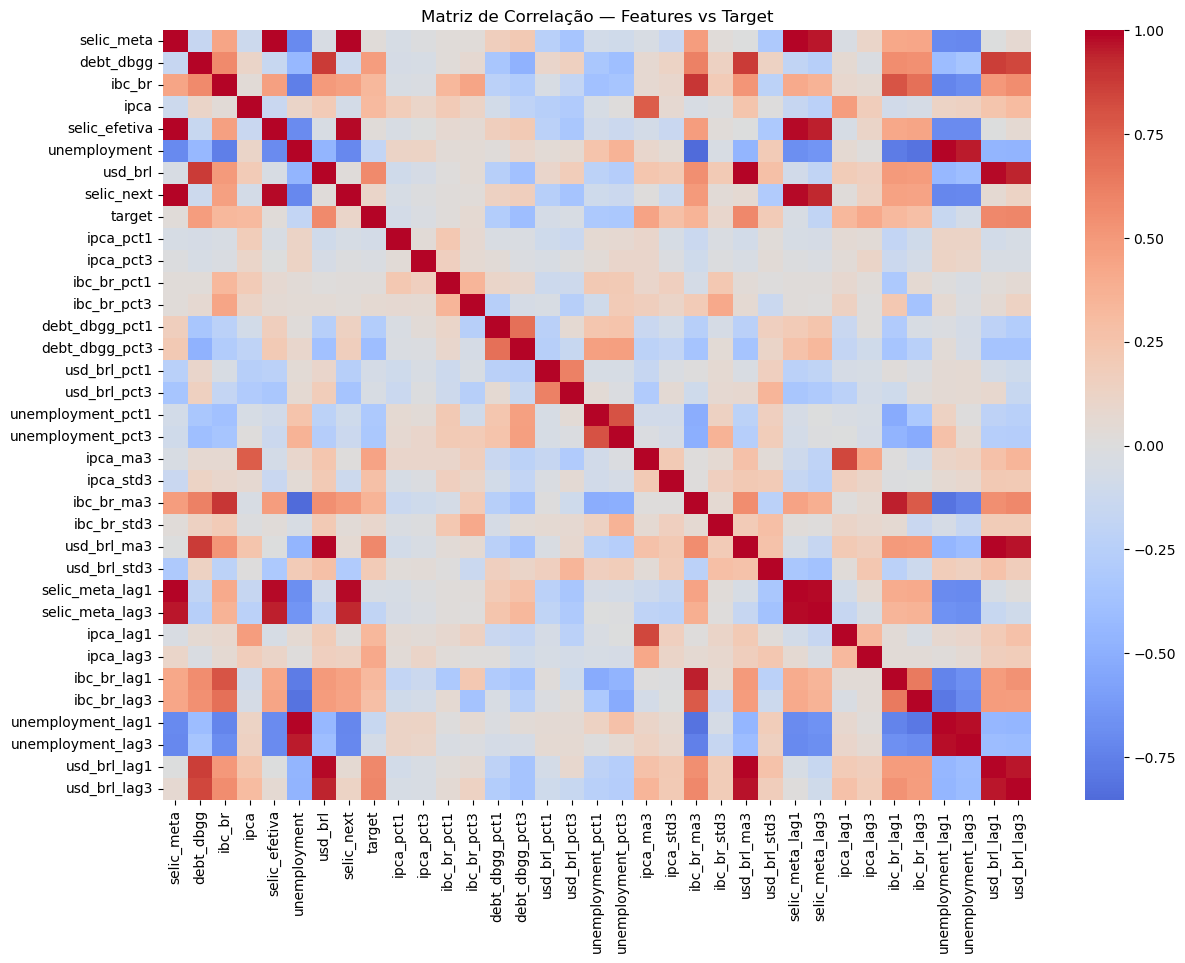

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))
sns.heatmap(df.select_dtypes(include=["number"]).corr(), cmap="coolwarm", center=0)
plt.title("Matriz de Correlação — Features vs Target")
plt.show()

In [8]:
df.to_csv("C:\\Users\\DELL\\OneDrive\\Área de Trabalho\\Ironhack\\final project\\data\\cleaned\\" + "model.csv", index=False)